In [ ]:
pip install matplotlib pillow scikit-learn torch torchvision


In [6]:
import random
import shutil
import os
import torch
import torchvision
import torch.nn as nn
import torchvision.transforms as transforms
import numpy as np
import glob
import pathlib
import torch.optim
from torch.optim import lr_scheduler
from torchvision import datasets, models
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support, f1_score, confusion_matrix
from PIL import Image


In [7]:
# Define the transformation pipeline
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()
])

# Correct the usage of the 'transform' variable
train_data = torchvision.datasets.ImageFolder("train", transform=transform)
test_data = torchvision.datasets.ImageFolder("test", transform=transform)
val_data = torchvision.datasets.ImageFolder("valid", transform=transform)

In [8]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False)
valid_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size, shuffle=False)

tensor([37, 15, 35, 15, 10,  2, 37,  4, 15, 33, 11, 35, 32, 10,  6, 15,  2, 16,
         0, 29, 35,  2, 36, 35,  4, 32, 34, 15, 23, 28, 18, 15])
['Tomato___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Orange___Haunglongbing_(Citrus_greening)', 'Corn_(maize)___healthy', 'Apple___Cedar_apple_rust', 'Tomato___healthy', 'Blueberry___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Grape___Black_rot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Septoria_leaf_spot', 'Corn_(maize)___healthy', 'Cherry_(including_sour)___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Apple___Cedar_apple_rust', 'Peach___Bacterial_spot', 'Apple___Apple_scab', 'Tomato___Early_blight', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Apple___Cedar_apple_rust', 'Tomato___Tomato_mosaic_virus', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Blueberry___healthy', 'Tomato___Septoria_leaf_spot', 'Tomato___Targ

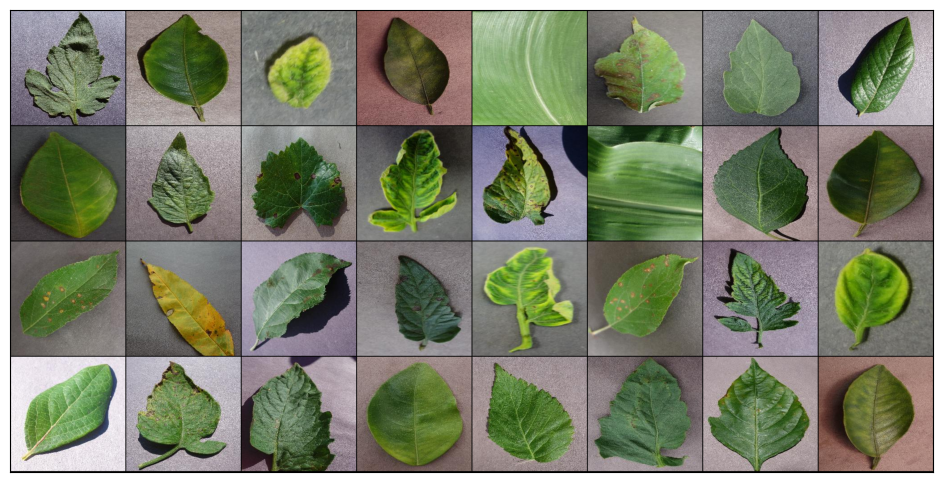

In [14]:
import matplotlib.pyplot as plt
from torchvision.utils import make_grid

def show_batch(dl):
    labels_list = []  # Create an empty list to store labels
    
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([])
        ax.set_yticks([])
        grid = make_grid(images, nrow=8).permute(1, 2, 0)
        ax.imshow(grid)
        
        # Print the labels
        for i, label in enumerate(labels):
            labels_list.append(label.item())  # Add label to the list
        print(labels)
        
        break
    
    return labels_list  # Return the list of labels

# Call the function to display the batch and collect labels
batch_labels = show_batch(train_loader)
class_names = train_data.classes
c=[]
for x in batch_labels:
    c.append(class_names[x])
print(c)
print(class_names)

In [9]:
len(train_loader)

1018

In [ ]:
import matplotlib.pyplot as plt
from torchvision.utils import make_grid

def show_one_image_per_class(dl, num_classes):
    images_per_class = [None] * num_classes  # Initialize with None

    for images, labels in dl:
        for image, label in zip(images, labels):
            if images_per_class[label.item()] is None:
                images_per_class[label.item()] = image
            if all(image is not None for image in images_per_class):
                break
        if all(image is not None for image in images_per_class):
            break

    fig, axs = plt.subplots(num_classes, 1, figsize=(4, 20))  # Adjust figsize as needed

    for i, image in enumerate(images_per_class):
        axs[i].imshow(image.permute(1, 2, 0))
        axs[i].set_title(f'Class {i}')
        axs[i].axis('off')

# Assuming num_classes is the number of classes in your dataset
show_one_image_per_class(train_loader, num_classes=38)
plt.show()


In [10]:
import torch.nn as nn
import torchvision.models as models

# Create a ResNet-18 model without pre-trained weights
model = models.resnet18(pretrained=False)

# Set requires_grad=True for all parameters
for p in model.parameters():
    p.requires_grad = True

# Get the number of input features for the final fully connected layer
num_ftrs = model.fc.in_features
print(num_ftrs)

# Replace the final fully connected layer with a new one for 38 classes
model.fc = nn.Linear(num_ftrs, 38)


512


C:\Users\jagan sri\AppData\Roaming\Python\Python310\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\jagan sri\AppData\Roaming\Python\Python310\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [12]:
import torch.optim as optim

# Define loss function and optimizer
loss = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Learning rate scheduler
step_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

# Training loop
num_epochs = 2  # Adjust as needed
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

train_accuracies = []  # List to store training accuracies
val_accuracies = []    # List to store validation accuracies
train_losses = []  # List to store training losses
val_losses = []    # List to store validation losses





In [55]:
import pickle

with open('rresnet18_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [11]:
import torch.optim as optim
import torch.nn as nn


# Define loss function and optimizer
loss = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 5  # Adjust as needed
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

train_accuracies = []  # List to store training accuracies
val_accuracies = []    # List to store validation accuracies
train_losses = []      # List to store training losses
val_losses = []        # List to store validation losses

for epoch in range(num_epochs):
    
    model.train()
    running_loss = 0.0
    correct_train_predictions = 0
    total_train_samples = 0
    i=1
    for inputs, labels in train_loader:
        if(i%20==0):
            print(i)
        i+=1
        inputs, labels = inputs.to(device), labels.to(device)
        total_train_samples += labels.size(0)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss_value = loss(outputs, labels)
        loss_value.backward()
        optimizer.step()

        running_loss += loss_value.item() * inputs.size(0)

        _, train_predicted = torch.max(outputs, 1)
        correct_train_predictions += torch.sum(train_predicted == labels.data)

    epoch_loss = running_loss / total_train_samples
    train_accuracy = correct_train_predictions.double() / total_train_samples
    print('train is completed')
    # Validation
    model.eval()
    val_running_loss = 0.0
    correct_val_predictions = 0

    with torch.no_grad():
        for val_inputs, val_labels in valid_loader:
            val_inputs, val_labels = val_inputs.to(device), val_labels.to(device)
            val_outputs = model(val_inputs)
            val_loss_value = loss(val_outputs, val_labels)
            val_running_loss += val_loss_value.item() * val_inputs.size(0)

            _, val_predicted = torch.max(val_outputs, 1)
            correct_val_predictions += torch.sum(val_predicted == val_labels.data)

    val_epoch_loss = val_running_loss / len(val_data)
    val_accuracy = correct_val_predictions.double() / len(val_data)

    print(f"Epoch [{epoch}], train_loss: {epoch_loss:.4f}, val_loss: {val_epoch_loss:.4f}, train_acc: {train_accuracy:.4f}, val_acc: {val_accuracy:.4f}")

    train_accuracies.append(train_accuracy.item())
    val_accuracies.append(val_accuracy.item())
    train_losses.append(epoch_loss)
    val_losses.append(val_epoch_loss)

print("Training complete.")


20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380
400
420
440
460
480
500
520
540
560
580
600
620
640
660
680
700
720
740
760
780
800
820
840
860
880
900
920
940
960
980
1000
train is completed
Epoch [0], train_loss: 1.1849, val_loss: 1.0831, train_acc: 0.6456, val_acc: 0.6525
20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380
400
420
440
460
480
500
520
540
560
580
600
620
640
660
680
700
720
740
760
780
800
820
840
860
880
900
920
940
960
980
1000
train is completed
Epoch [1], train_loss: 0.5275, val_loss: 1.1497, train_acc: 0.8314, val_acc: 0.7045
20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380
400
420
440
460
480
500
520
540
560
580
600
620
640
660
680
700
720
740
760
780
800
820
840
860
880
900
920
940
960
980
1000
train is completed
Epoch [2], train_loss: 0.3388, val_loss: 0.3567, train_acc: 0.8907, val_acc: 0.8793
20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380
400
420
440
460
480
500
520


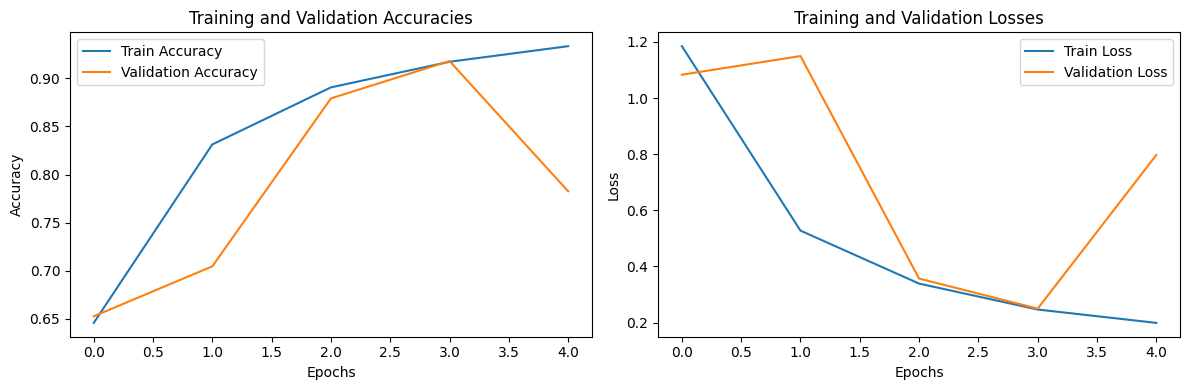

In [13]:
# Plotting the accuracy and loss graphs
epochs_range = range(num_epochs)
plt.figure(figsize=(12, 4))

# Subplot for accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_accuracies, label='Train Accuracy')
plt.plot(epochs_range, val_accuracies, label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracies')

# Subplot for loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_losses, label='Train Loss')
plt.plot(epochs_range, val_losses, label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Losses')

plt.tight_layout()
plt.show()

In [12]:
torch.save(model.state_dict(), "Resnet18_aadam.pth")


In [ ]:
correct_predictions = [0] * 38  # To keep track of correct predictions for each class
total_samples = [0] * 38  # To keep track of total samples for each class

model.eval()  # Set the model to evaluation mode

with torch.no_grad():
    i=1
    for inputs, labels in test_loader:
        if(i%20==0):
            print(i)
        i+=1
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)

        # Update statistics for each class
        for i in range(len(predicted)):
            total_samples[labels[i]] += 1
            if predicted[i] == labels[i]:
                correct_predictions[labels[i]] += 1

# Calculate and print performance for each class
for i in range(38):
    accuracy = correct_predictions[i] / total_samples[i] if total_samples[i] > 0 else 0
    print(f"Class {class_folders[i]}: \n\t Accuracy = {accuracy:.2%} ({correct_predictions[i]}/{total_samples[i]})")

overall_accuracy = sum(correct_predictions) / sum(total_samples)
print(f"\nOverall Accuracy: {overall_accuracy:.2%}")

In [18]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt

# Load the trained model
# model = ... (Load your trained model here)
model.eval()

# Define the transformation pipeline (similar to what you used for training)
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    # Add any other transformations you used during training
])
def preprocess_image(image_path):
    image = Image.open(image_path)
    image = transform(image)
    return image.unsqueeze(0)  # Add a batch dimension



In [20]:
def predict_and_display(image_path):
    image = preprocess_image(image_path)
    image = image.to(device)  # Move input data to the same device as the model
    model.to(device)  # Move the model to the same device as the input data
    with torch.no_grad():
        outputs = model(image)
        print(outputs)
    _, predicted = torch.max(outputs, 1)

    print(predicted)
    class_names = train_data.classes  # Replace with your class names
    predicted_class = class_names[predicted.item()]
    print(train_data.classes)

    plt.imshow(image.squeeze().permute(1, 2, 0).cpu())  # Move image back to CPU for display
    plt.title(f"Predicted : {predicted_class}")
    plt.axis('off')
    plt.show()

# Replace 'image_path' with the path to an image in your Google Drive



tensor([[ -1.7704, -12.4564,  -1.3797,   0.2044,  -2.6953,  -1.6853, -10.3343,
         -14.5272, -17.3119,  -4.3222, -26.9425,  -3.1816,  -9.9810, -10.7225,
         -17.2265,   9.3037,  -0.6792,  -8.6170,  -5.9788,  -9.4011, -22.5430,
          -3.8470,  -3.6712, -13.9082,  -9.1048,  -8.4996, -10.8913, -18.8872,
          -5.5191,  -1.8572,  -6.7896,  -5.1335,  -1.5677,   0.9643,  -3.0295,
          -2.4539,  -7.2789,  -7.6500]])
tensor([15])
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy',

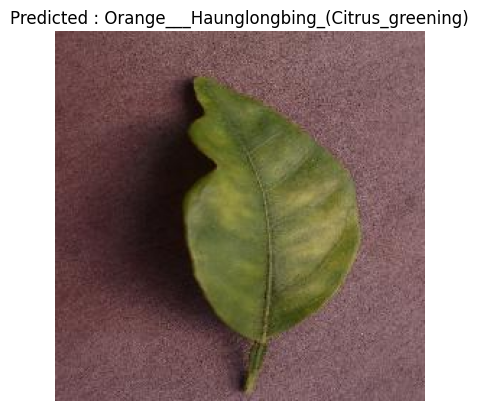

In [53]:
image_path = 'train/Orange___Haunglongbing_(Citrus_greening)/0a0e1e0f-e0d2-4a9b-9265-ec636592d0b2___CREC_HLB 7565.JPG'
predict_and_display(image_path)

In [78]:
from PIL import Image
import pickle
with open('rresnet18_model.pkl', 'rb') as f:
    model11 = pickle.load(f) 
model11.eval()
class_labels =['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']

def get_class_label(class_index):
    return class_labels[class_index]

def predict_image(img):
    image = transform(img).unsqueeze(0)
    with torch.no_grad():
        outputs = model11(image)
        print(len(outputs[0])) 
        print(outputs)
    _, predicted = torch.max(outputs, 1)

    print(predicted) 
    class_index = predicted.item()
    class_label = get_class_label(class_index)
    return {"class_index": class_index, "class_label": class_label}

    class_labels =train_data.classes

# Load the imagetrain/Blueberry___healthy/0a0b8f78-df2d-4cfc-becf-cdevalid/Raspberry___healthy/0df51eb7-e701-492b-bb9f-994d30ea16c7___Mary_HL 6301.JPG10fa2766b___RS_HL 5487.JPG
image_path = "valid/Apple___Cedar_apple_rust/0a41c25a-f9a6-4c34-8e5c-7f89a6ac4c40___FREC_C.Rust 9807.JPG"
img = Image.open(image_path)

# Call the predict_image function with the loaded image
prediction = predict_image(img)
print(prediction)


38
tensor([[ -3.2624,  -4.2728,   1.9374,  -2.1923,  -2.5063,  -6.6128,  -4.6147,
          -5.4532, -12.4720,  -0.3292, -13.3284,  -8.6842, -10.0606, -13.3782,
          -6.4627,  -2.8746,   0.5448,  -5.6223,  -5.2361,  -6.7404,  -9.5763,
          -3.8622,  -6.1806,  -8.1744,  -4.2294,   0.0384,  -6.1123,  -8.1328,
          -8.5644,  -7.7714,   0.8322, -10.8837,  -2.7632, -11.4323,  -9.4492,
          -4.6184, -21.3440, -10.7247]])
tensor([2])
{'class_index': 2, 'class_label': 'Apple___Cedar_apple_rust'}
